# Probability Distributions Exercises

Do your work for this exercise in either a python script named probability_distributions.py or 
a jupyter notebook named probability_distributions.ipynb.

For the following problems, use python to simulate the problem and calculate an experimental 
probability, then compare that to the theoretical probability.



In [185]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from scipy.stats import poisson

# import viz # curriculum viz example code

np.random.seed(123)


1). A bank found that the average number of cars waiting during the noon hour at a drive-up 
window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution
and answer these questions concerning the probability of cars waiting at the drive-up window.


What is the probability that no cars drive up in the noon hour?

What is the probability that 3 or more cars come through the drive through?

How likely is it that the drive through gets at least 1 car?

Text(0.5, 1.0, 'Cars with poisson mean of 2')

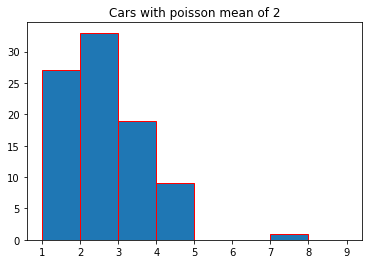

In [19]:
cars = 100

x = poisson.rvs(mu = 2, size= cars)

plt.hist(x, bins=range(1, 10), width=1, ec='red')

plt.title('Cars with poisson mean of 2')

In [20]:
# No car drives in the drive through


cars = 0

traffic_one_hour = np.random.random(2)


traffic_one_hour = np.where(traffic_one_hour == 0, 0,traffic_one_hour)

traffic_one_hour.mean() 



0.5392706545729752

In [21]:
# 0 cars CORRECT************

stats.poisson(2).pmf(0)

0.1353352832366127

In [22]:
# What is the probability that 3 or more cars come through the drive through?***********

traffic = stats.randint(1,100)

traffic.sf(3)

0.9696969696969697

In [23]:
# What is the probability that 3 or more cars come through the drive through?***********

stats.poisson(2).pmf(3)

0.18044704431548356

In [24]:
# How likely is it that the drive through gets at least 1 car?

traffic.isf(1/2)

50.0


2). Grades of State University graduates are normally distributed with a mean of 3.0 and a standard 
deviation of .3. Calculate the following:

2a). What grade point average is required to be in the top 5% of the graduating class?

2b). What GPA constitutes the bottom 15% of the class?

2c). An eccentric alumnus left scholarship money for students in the third decile from the bottom of 
their class. Determine the range of the third decile. Would a student with a 2.8 grade point average 
qualify for this scholarship?

If I have a GPA of 3.5, what percentile am I in?

In [25]:
# 2a). What grade point average is required to be in the top 5% of the graduating class?

grade_mean = 3.0
std_grade = 0.3

gpa = stats.norm(grade_mean, std_grade)

top_five_percent = gpa.ppf(.05)

top_five_percent

2.5065439119145583

In [26]:
# 2b). What GPA constitutes the bottom 15% of the class?

bottom_fifteen_percent = gpa.cdf(.15)

bottom_fifteen_percent

1.0494515075362604e-21

In [27]:
# 2c). An eccentric alumnus left scholarship money for students in the third decile from the bottom of 
# their class. Determine the range of the third decile. Would a student with a 2.8 grade point average 
# qualify for this scholarship?*********************






In [28]:
# 2d). If I have a GPA of 3.5, what percentile am I in?******************

percentile_value = gpa.ppf(0.75)

percentile_value

3.2023469250588246


3). A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 
click-throughs. How likely is it that this many people or more click through?

In [29]:
stats.binom(4326, 0.02).pmf(97)

0.02194293045437555

4). You are working on some statistics homework consisting of 100 questions where all of the answers are a 
probability rounded to the hundreths place. Looking to save time, you put down random probabilities as 
the answer to each question.

What is the probability that at least one of your first 60 answers is correct?



In [177]:
stats.binom(100, 0.01).sf(60)

6.129908671335171e-95

5). The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that 
there's a 3% chance that any one student cleans the break area when they visit it, and, on any 
given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is 
it that the break area gets cleaned up each day? How likely is it that it goes two days without 
getting cleaned up? All week?

In [31]:
#5a). How likely is it that the break area gets cleaned up each day?

visits_per_day = (0.9 * (3 *22))

each_day = stats.binom(visits_per_day, 0.03).pmf(1)

each_day

0.30086868013300505

In [32]:
# 5b). How likely is it that it goes two days without getting cleaned up?
two_days = stats.binom(visits_per_day, 0.03).pmf(2)

two_days

0.27171233381083754

In [33]:
# 5c). All week?

all_week = stats.binom(visits_per_day, 0.03).pmf(5)

print(all_week)


0.024027435762619603



6). You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After 
several weeks of careful observation, you notice that the average number of people in line when your lunch 
break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes 
for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that 
you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have 
one hour for lunch, and ignore travel time to and from La Panaderia.

In [175]:
num_ppl_mean = 15
num_ppl_std = 3

# mean_time = 15 * 2

lunch_time = stats.norm(num_ppl_mean,num_ppl_std).isf(15/60)

lunch_time

17.023469250588246


7). Connect to the employees database and find the average salary of current employees, along with the standard 
deviation. For the following questions, calculate the answer based on modeling the employees salaries with a 
normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual 
values present in the salaries dataset.



a). What percent of employees earn less than 60,000?
b). What percent of employees earn more than 95,000?
c). What percent of employees earn between 65,000 and 80,000?
d). What do the top 5% of employees make?

In [192]:
from env import host, user, password


url = f'mysql+pymysql://{user}:{password}@{host}/employees'


salaries_query = 'SELECT * FROM salaries LIMIT 5 OFFSET 50'


pd.read_sql(salaries_query, url)

In [194]:
df = pd.DataFrame(pd.read_sql(salaries_query, url))

df

,emp_no,salary,from_date,to_date
0,10005,85076,1993-09-11,1994-09-11
1,10005,86050,1994-09-11,1995-09-11
2,10005,88448,1995-09-11,1996-09-10
3,10005,88063,1996-09-10,1997-09-10
4,10005,89724,1997-09-10,1998-09-10


In [199]:
mean_salaries = df.salary.mean()
mean_salaries

87472.2

In [203]:
std_salaries = df.salary.std()
std_salaries

1879.9109553380447

In [214]:
# a). What percent of employees earn less than 60,000? b).

sal_below_sixty_thousand = stats.norm(mean_salaries, std_salaries).cdf(60000)

sal_below_sixty_thousand


1.1507720274561179e-48

In [219]:

# b). What percent of employees earn more than 95,000? 

sal_above_ninety_five_thousand = stats.norm(mean_salaries, std_salaries).sf(95000)

sal_above_ninety_five_thousand

3.109561729877341e-05

In [240]:
# c). What percent of employees earn between 65,000 and 80,000? d). 
data_range = df.salary[(df.salary >= 65000) & (df.salary <= 80000)]

sal_between_range = stats.norm(mean_salaries, std_salaries).ppf(data_range)

sal_between_range

array([], dtype=float64)

In [244]:
# d). What do the top 5% of employees make?

sal_above_five_percent = stats.norm(mean_salaries, std_salaries).isf(0.05)

sal_above_five_percent



90564.3783532336


## Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql.

## Be sure to run the following 2 commands from your terminal: 1. cp ~/codeup-data-science/numpy-pandas-visualization-exercises/.gitignore ~/codeup-data-science/statistics-exercises to ensure that your stats repo has a known-good gitignore 2. cp ~/codeup-data-science/numpy-pandas-exercises/env.py ~/codeup-data-science/statistics-exercises to ensure that pandas will have access to your db credentials.